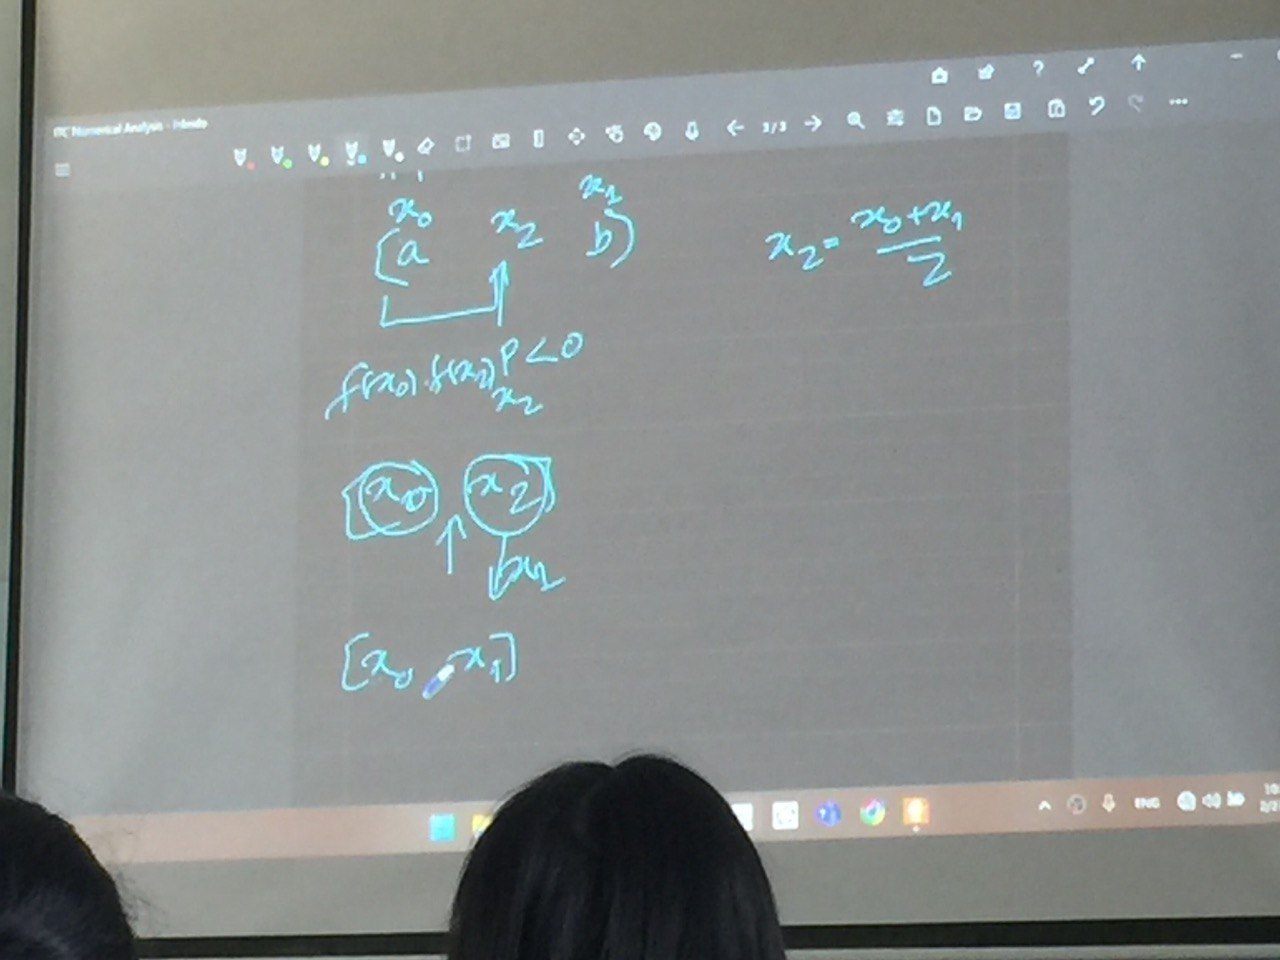

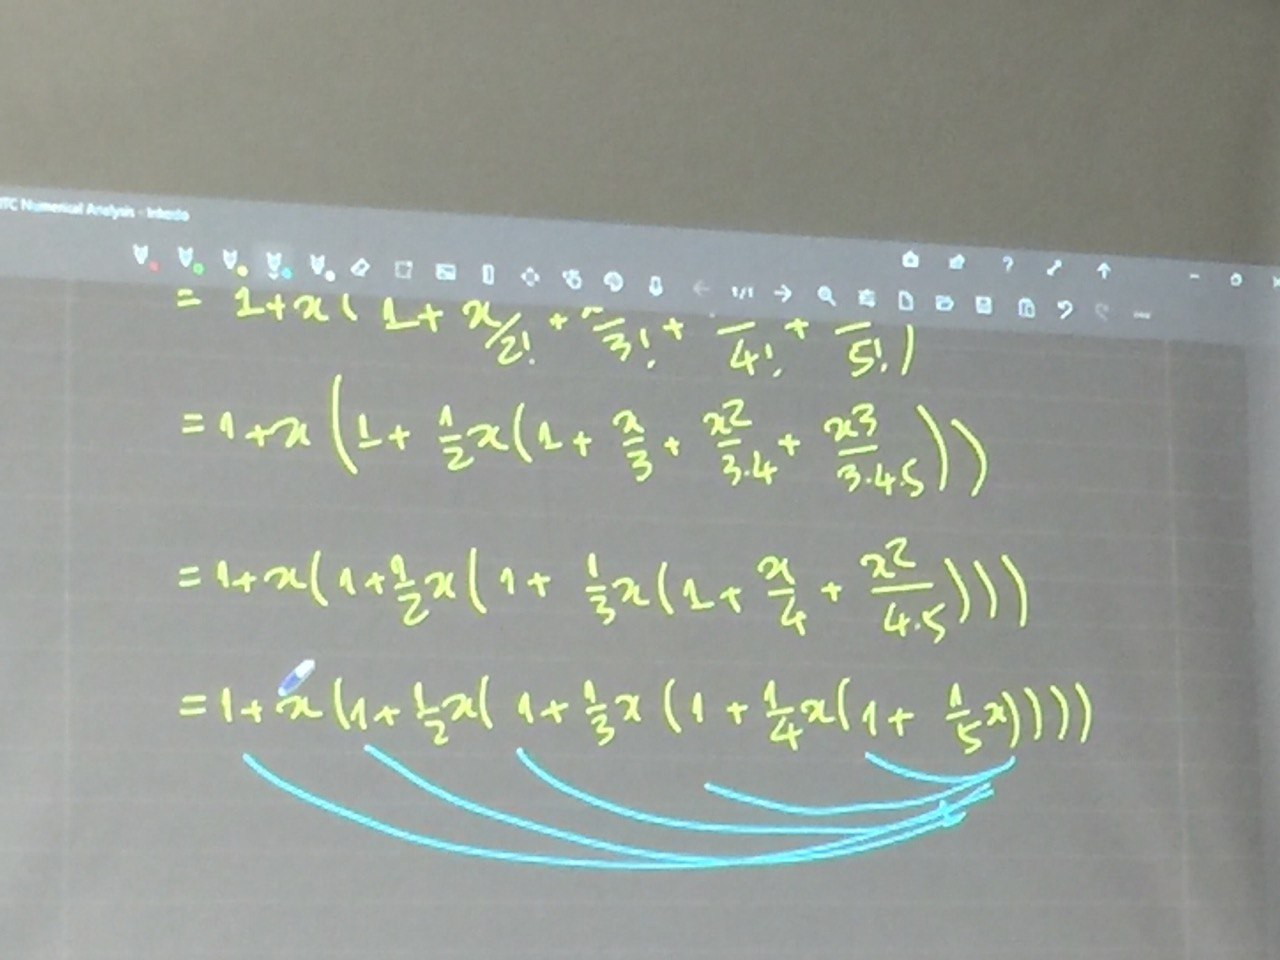

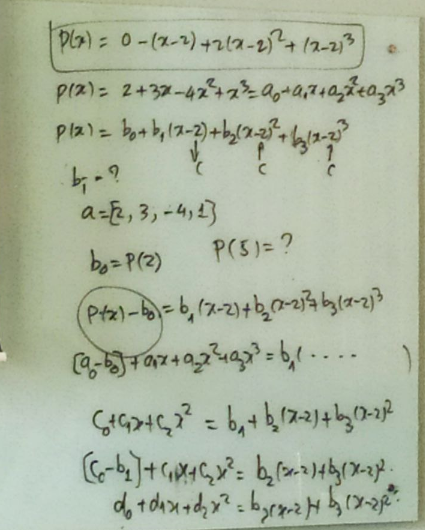

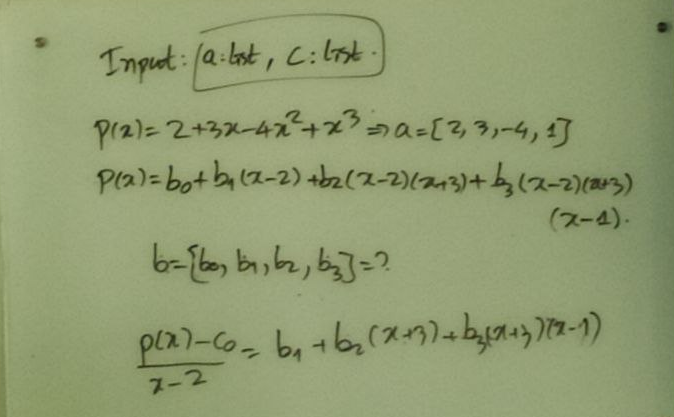

In [1]:
def EvaluatePolynomial(a: list[complex], x: complex) -> complex:
    """
    TODO
    ----------
    Evaluate a polynomial and its first and second derivatives at a given value of `x`.

    Parameters
    ----------
    1) `a` : `list[complex]`
        list of complex coefficients `[a_0,...,a_n]` of the polynomial `p(x)=a_0+a_1 x+...+a_n x^n`
    2) `x` : `complex`
        complex value at which the polynomial to be evaluated

    Return
    ----------
    1) `p` : `complex`
        complex value of the polynomial evaluated at `x`

    Example
    ----------
    >>> import NumericalAnalysis as na
    >>> p = na.EvaluatePolynomial(a=[1, 1, 1], x=1)
    >>> print(p)
    """
    N = len(a)
    n = N - 1
    p = a[n]
    for i in range(1, N, 1):
        p = a[n - i] + x * p
    return p


In [2]:
def EvaluatePolynomialN(a: list[complex], x: complex, d: int = 0) -> list:
    """
    TODO
    ----------
    Evaluate a polynomial and its first, second and `d`-th derivatives at a given value of `x`.

    Parameters
    ----------
    1) `a` : `list[complex]`
        list of coefficients `[a_0,...,a_n]` of the polynomial `p(x)=a_0+a_1 x+...+a_n x^n`
    2) `x` : `complex`
        complex value at which the polynomial to be evaluated

    Return
    ----------
    1) `p` : `complex`
        list of complex value of the polynomial and its consecutive derivatives evaluated at `x`

    Example
    ----------
    >>> import NumericalAnalysis as na
    >>> p = na.EvaluatePolynomialN(a=[1, 2, 3, 4, 5], x=1, d=8)
    >>> for pi in p:
    >>>     print(pi)
    """
    n = len(a) - 1
    p = [0] * (d + 1)
    p[0] = a[n]
    stop = n + 1
    for k in range(1, stop, 1):
        for i in range(d, 0, -1):
            p[i] = i * p[i - 1] + p[i] * x
        p[0] = a[n - k] + p[0] * x
    return p


In [3]:
def DeflatePolynomial(a: list[complex], x: complex) -> list[complex]:
    """
    TODO
    ----------
    Deflate a polynomial `p(x)` to `q(x)` with monic linear factor containing the given zero.

    Parameters
    ----------
    1) `a` : `list[complex]`
        list of coefficients `[a_0,a_1,...,a_n]` of `p(x)=a_0+a_1 x+...+a_n x^n`
    2) `x` : `complex`
        zero of `p(x)`

    Return
    ----------
    1) `b` : `list[complex]`
        list of coefficients `[b_0,b_1,...,b_{n-1}]` of `q(x)=b_0+b_1 x+...+b_{n-1} x^{n-1}`

    Example
    ----------
    >>> import NumericalAnalysis as na
    >>> a = [1, 2, -3]
    >>> b = na.DeflatePolynomial(a=a, x=1)
    >>> print(f"a = {a}")
    >>> print(f"b = {b}")
    """
    n = len(a) - 1
    b = [(0 + 0j)] * n
    b[n - 1] = a[n]
    for k in range(n - 2, -1, -1):
        b[k] = a[k + 1] + x * b[k + 1]
    return b


In [10]:
from EvaluatePolynomial import EvaluatePolynomial
from DeflatePolynomial import DeflatePolynomial
def ShiftedPowerPOlynomial(a:list[complex],c:complex)->list[complex]:
  N = len(a)
  b = [0]*N
  b[0] = EvaluatePolynomial(a=a,x=c)
  for k in range(1,N,1):
    a[0] = a[0] - b[k-1]
    a = DeflatePolynomial(a=a,x=c)
    b[k] = EvaluatePolynomial(a=a,x=c)
  return b

if __name__ == "__main__":
  a = [2,3,-4,1]
  b = ShiftedPowerPOlynomial(a=a,c=2)
  print(a)
  print(b)
  print(EvaluatePolynomial(a=a,x=5))
  

[2, 3, -4, 1]
[0, -1, 2, 1]
42


In [11]:
def NewtonPolynomial(a:list[complex],c:complex)->list[complex]:
  N = len(a)
  b = [0]*N
  n = N-1
  b[0] = EvaluatePolynomial(a=a,x=c[0])
  for k in range(1,N,1):
    a[0] = a[0] - b[k-1]
    a = DeflatePolynomial(a=a,x=c[k-1])
    b[k] = EvaluatePolynomial(a=a,x=c[k])
  a = DeflatePolynomial(a=a,x=c[n-1])
  b[n] = a[0]  
  return b

if __name__ == "__main__":
  a = [2,3,-4,1]
  c = [2,-3,1]
  b = NewtonPolynomial(a=a,c=c)
  print(a)
  print(b)

IndexError: list index out of range

In [6]:
def EvaluateNewtonPolynomial(a:list[complex], c:list[complex], x:complex)->complex:
  n = len(a) - 1
  p = a[n] 
  start = n-1
  for k in range(start,-1,-1):
    p = a[k] + p*(x-c[k])
  return p

if __name__ == "__main__":
  a = [0,14,-4,1]
  c = [2,-3,1]
  x = 0
  p = EvaluateNewtonPolynomial(a=a,c=c,x=x)
  print(p)

2


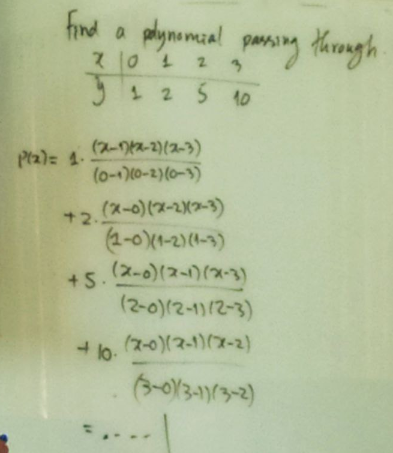

 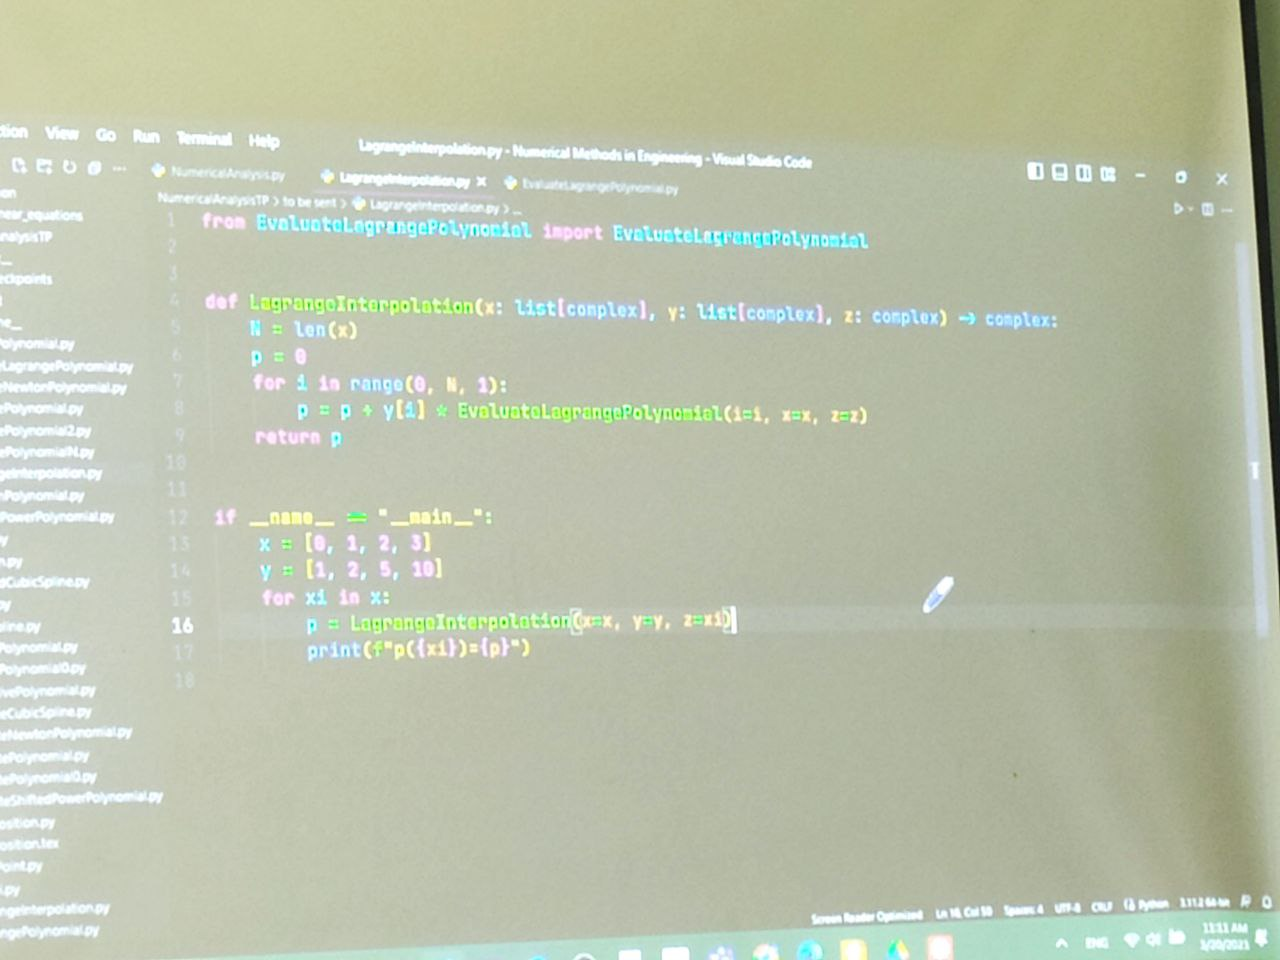

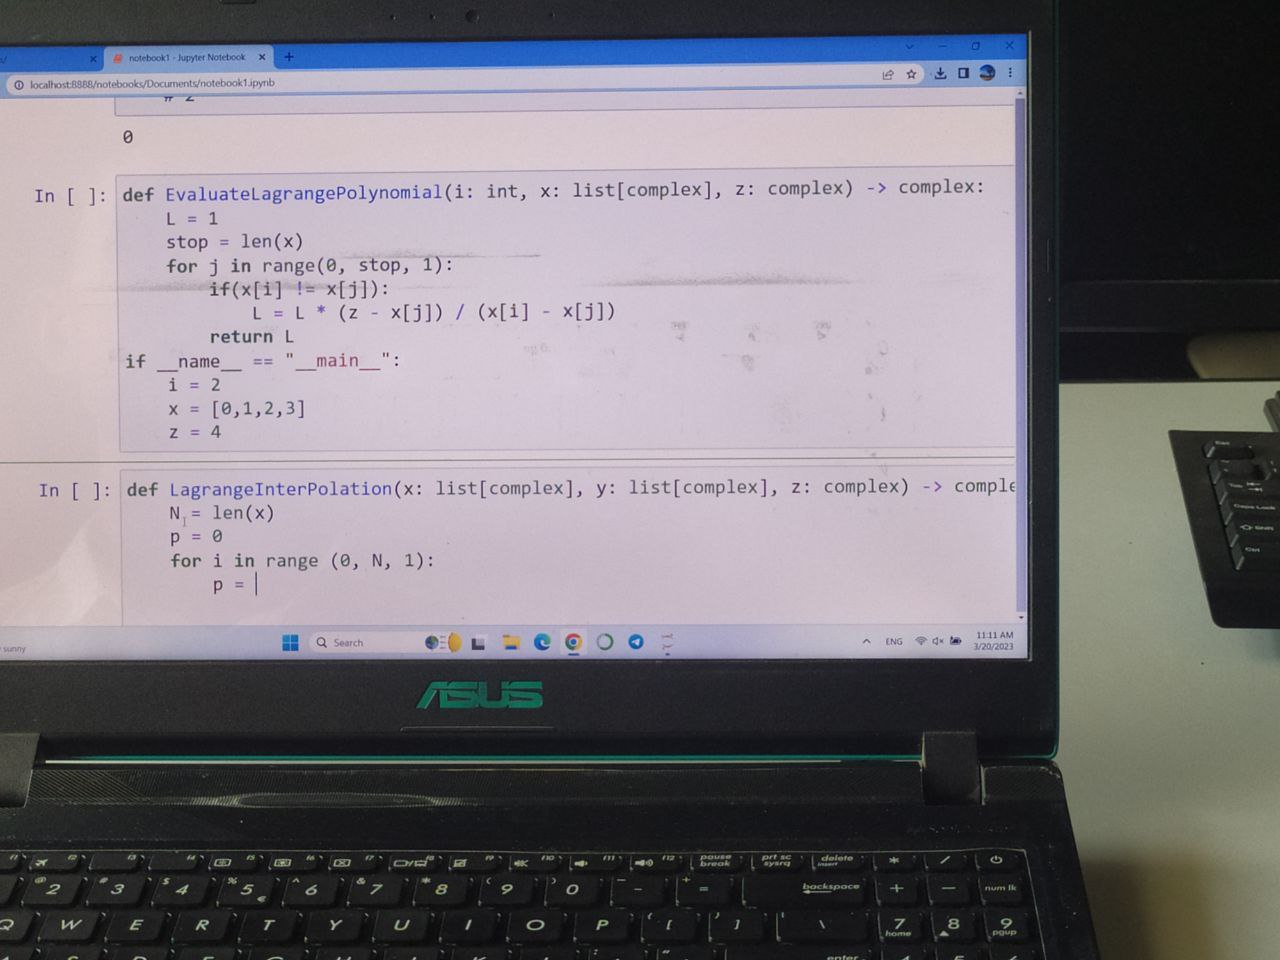